# Plotter

In [14]:
from matplotlib import pyplot as plt
import seaborn
import os
from plotter import Plotter
from matplotlib.font_manager import FontManager
from matplotlib.font_manager import findSystemFonts
from matplotlib import rcParams

font_dirs = [os.path.join(os.getcwd(), 'fonts', 'Serif')]
font_files = findSystemFonts(fontpaths=font_dirs)

fm = FontManager()
for path in font_files:
    fm.addfont(path)
    
rcParams['font.family'] = 'Computer Modern Serif'
rcParams['text.usetex'] = True

dirPathPlot = os.path.join(os.getcwd(), 'plots')
if not os.path.isdir(dirPathPlot):
    os.mkdir(dirPathPlot)

Matplotlib is building the font cache; this may take a moment.


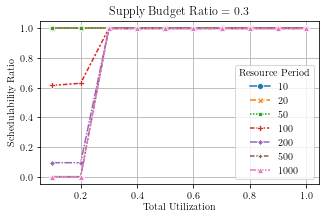

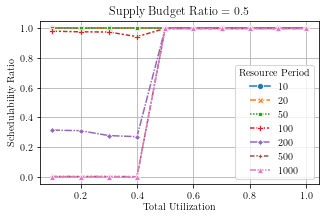

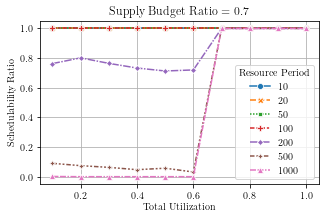

In [26]:
masterData = Plotter()
masterData = masterData.database.assign(scheduleSuccess=masterData.database["Scaling Factor"]>=0)

# index = X Axis; columns = Parameter Varied; values = Y Axis
pIndex = "Total Utilization"
pColumns = "Resource Period"
pValues = "Schedulability Ratio"
pCategory = "Supply Budget Ratio"

successGB = masterData.groupby(by=[pCategory, pColumns, pIndex])["scheduleSuccess"]

resultsDF = successGB.sum().to_frame()
resultsDF = resultsDF.assign(scheduleTotal=successGB.count())
resultsDF = resultsDF.assign(scheduleRatio=lambda x: x.scheduleSuccess/x.scheduleTotal)
resultsDF.rename(columns = {'scheduleSuccess':'Schedule Success', 'scheduleTotal':'Schedule Total', 'scheduleRatio':pValues}, inplace = True)
resultsDF = resultsDF.reset_index()

cColumns = resultsDF[pCategory].unique()
numPlots = len(cColumns)

for categoryIndex in range(numPlots):
    fig, ax = plt.subplots(figsize=(5, 3))
    plotData = resultsDF[resultsDF[pCategory] == cColumns[categoryIndex]].pivot(index=pIndex, columns=pColumns, values=pValues)
    seaborn.lineplot(
        data = plotData,
        ax = ax,
        markers = True,
        legend = False)
    ax.grid(True)
    ax.set_ylim((-0.05, 1.05))
    ax.set_ylabel(pValues)
    ax.set_title('{:} = {:}'.format(pCategory, cColumns[categoryIndex]))
    ax.legend(
        labels = resultsDF[pColumns].unique(),
        loc="lower right",
        title=pColumns)

    fileNamePlot = '{:}_{:}_{:02d}.pdf'.format(pColumns,pCategory,int(cColumns[categoryIndex]*10)).replace(" ", "")
    fig.savefig(
        fname = os.path.join(dirPathPlot, fileNamePlot),
        bbox_inches = "tight",
        dpi = 600)


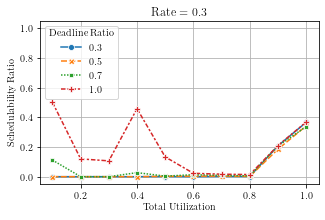

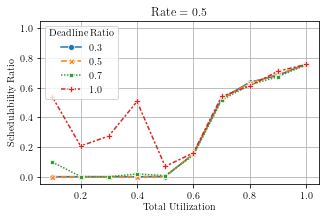

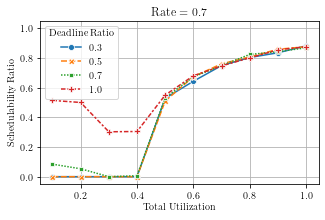

In [23]:
masterData = Plotter()
masterData = masterData.database.assign(scheduleSuccess=masterData.database["Scaling Factor"]>=0)

# index = X Axis; columns = Parameter Varied; values = Y Axis
pIndex = "Total Utilization"
pColumns = "Deadline Ratio"
pValues = "Schedulability Ratio"
pCategory = "Rate"

successGB = masterData.groupby(by=[pCategory, pColumns, pIndex])["scheduleSuccess"]

resultsDF = successGB.sum().to_frame()
resultsDF = resultsDF.assign(scheduleTotal=successGB.count())
resultsDF = resultsDF.assign(scheduleRatio=lambda x: x.scheduleSuccess/x.scheduleTotal)
resultsDF.rename(columns = {'scheduleSuccess':'Schedule Success', 'scheduleTotal':'Schedule Total', 'scheduleRatio':pValues}, inplace = True)
resultsDF = resultsDF.reset_index()

cColumns = resultsDF[pCategory].unique()
numPlots = len(cColumns)

for categoryIndex in range(numPlots):
    fig, ax = plt.subplots(figsize=(5, 3))
    plotData = resultsDF[resultsDF[pCategory] == cColumns[categoryIndex]].pivot(index=pIndex, columns=pColumns, values=pValues)
    seaborn.lineplot(
        data = plotData,
        ax = ax,
        markers = True,
        legend = False)
    ax.grid(True)
    ax.set_ylim((-0.05, 1.05))
    ax.set_ylabel(pValues)
    ax.set_title('{:} = {:}'.format(pCategory, cColumns[categoryIndex]))
    ax.legend(
        labels = resultsDF[pColumns].unique(),
        loc="upper left",
        title=pColumns)

    fileNamePlot = '{:}_{:}_{:02d}.pdf'.format(pColumns,pCategory,int(cColumns[categoryIndex]*10)).replace(" ", "")
    fig.savefig(
        fname = os.path.join(dirPathPlot, fileNamePlot),
        bbox_inches = "tight",
        dpi = 600)
